In [5]:
from google.colab import files
uploaded = files.upload()



Saving laptop.csv to laptop (1).csv


 Data Loaded Successfully!
Rows: 1014  | Columns: 15

🔍 Missing Values:
 Unnamed: 0             0
model_name             0
brand                  0
processor_name         0
ram(GB)                0
ssd(GB)                0
Hard Disk(GB)          0
Operating System       0
graphics               0
screen_size(inches)    2
resolution (pixels)    3
no_of_cores            0
no_of_threads          0
spec_score             0
price                  0
dtype: int64

 After Cleaning:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1014 entries, 0 to 1013
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   unnamed:_0           1014 non-null   int64  
 1   model_name           1014 non-null   object 
 2   brand                1014 non-null   object 
 3   processor_name       1014 non-null   object 
 4   ram(gb)              1014 non-null   int64  
 5   ssd(gb)              1014 non-null   int64  
 6   hard_disk

,unnamed:_0,model_name,brand,processor_name,ram(gb),ssd(gb),hard_disk(gb),operating_system,graphics,screen_size(inches),resolution_(pixels),no_of_cores,no_of_threads,spec_score,price
count,1014.000000,1014,1014,1014,1014.000000,1014.000000,1014.000000,1014,1014,1012.000000,1011,1014.000000,1014.000000,1014.000000,1014.000000
unique,NaN,924,22,123,NaN,NaN,NaN,5,156,NaN,30,NaN,NaN,NaN,NaN
top,NaN,Dell Latitude 3420 Laptop,Asus,12th Gen Core i5,NaN,NaN,NaN,Windows,Intel Iris Xe Graphics,NaN,1920 x 1080,NaN,NaN,NaN,NaN
freq,NaN,7,220,153,NaN,NaN,NaN,958,118,NaN,677,NaN,NaN,NaN,NaN
mean,510.264300,NaN,NaN,NaN,12.485207,560.591716,62.761341,NaN,NaN,15.018320,NaN,7.043393,10.962525,63.608481,87386.668639
std,293.245029,NaN,NaN,NaN,6.371308,310.600496,241.494091,NaN,NaN,1.036819,NaN,3.868021,5.620139,13.390836,62815.143328
min,0.000000,NaN,NaN,NaN,4.000000,0.000000,0.000000,NaN,NaN,10.100000,NaN,0.000000,0.000000,0.000000,15990.000000
25%,257.250000,NaN,NaN,NaN,8.000000,512.000000,0.000000,NaN,NaN,14.000000,NaN,4.000000,8.000000,56.000000,46999.250000
50%,510.500000,NaN,NaN,NaN,8.000000,512.000000,0.000000,NaN,NaN,15.600000,NaN,6.000000,12.000000,63.000000,69900.000000
75%,763.750000,NaN,NaN,NaN,16.000000,512.000000,0.000000,NaN,NaN,15.600000,NaN,10.000000,16.000000,72.000000,104890.000000


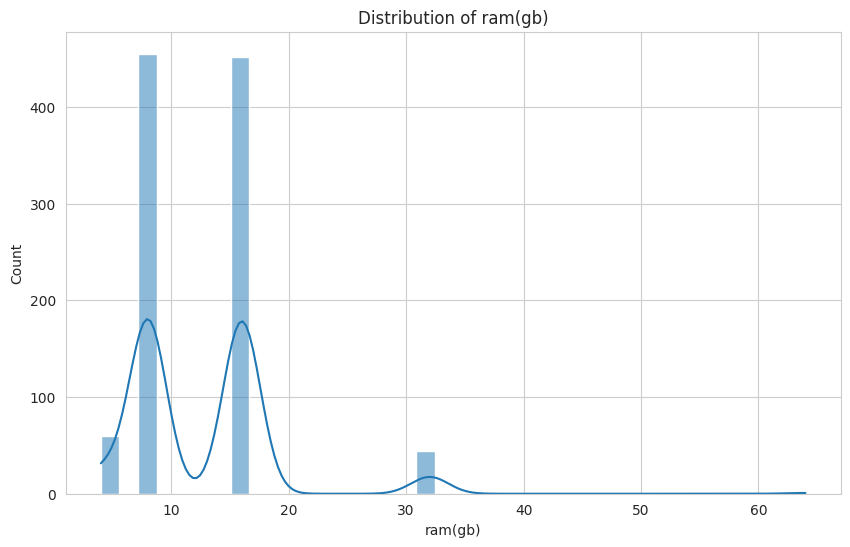

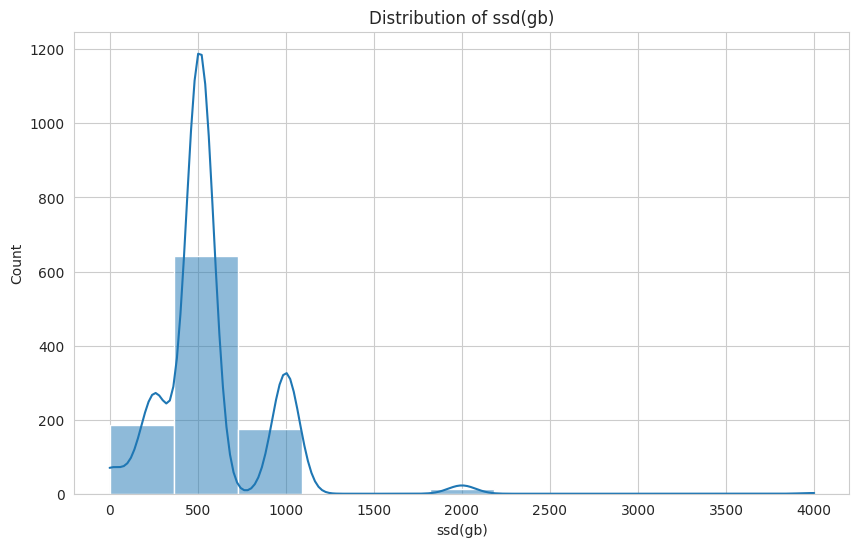

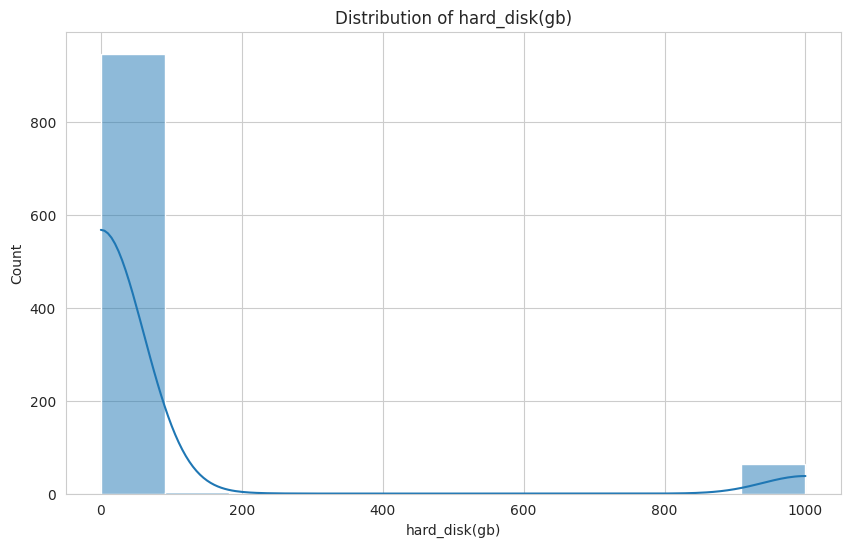

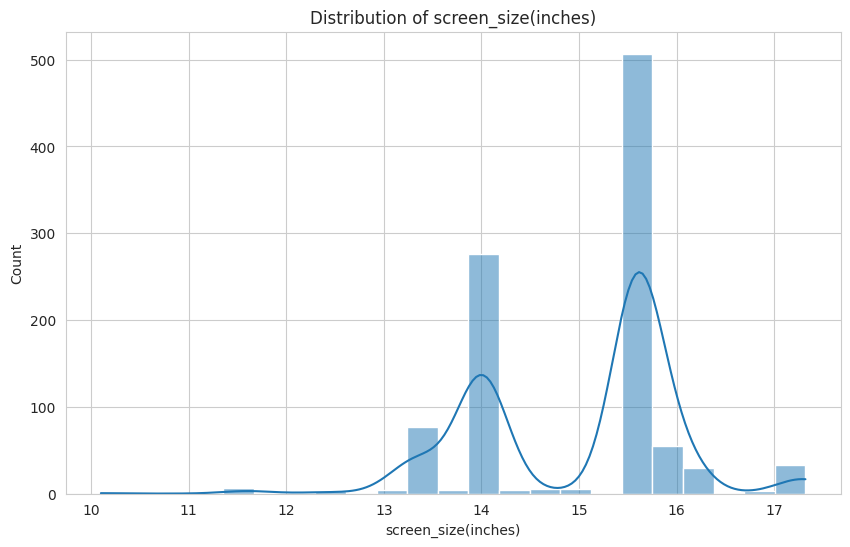

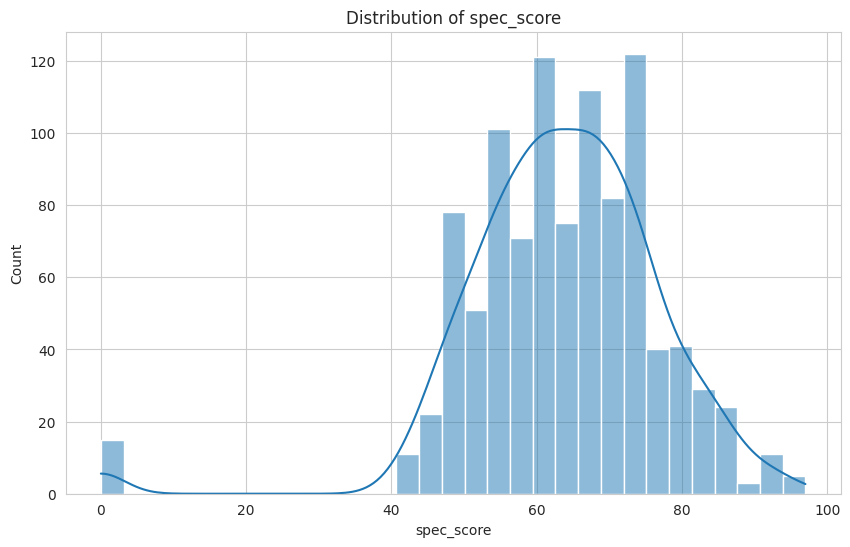

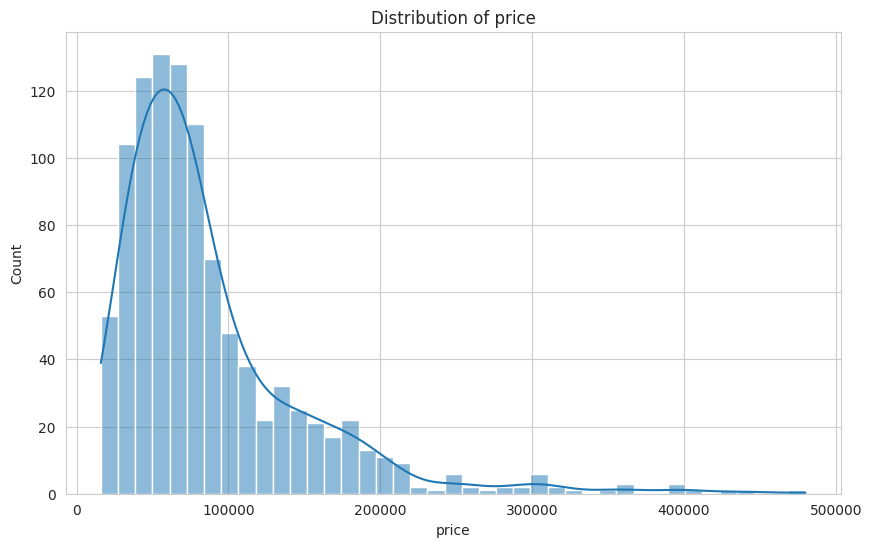

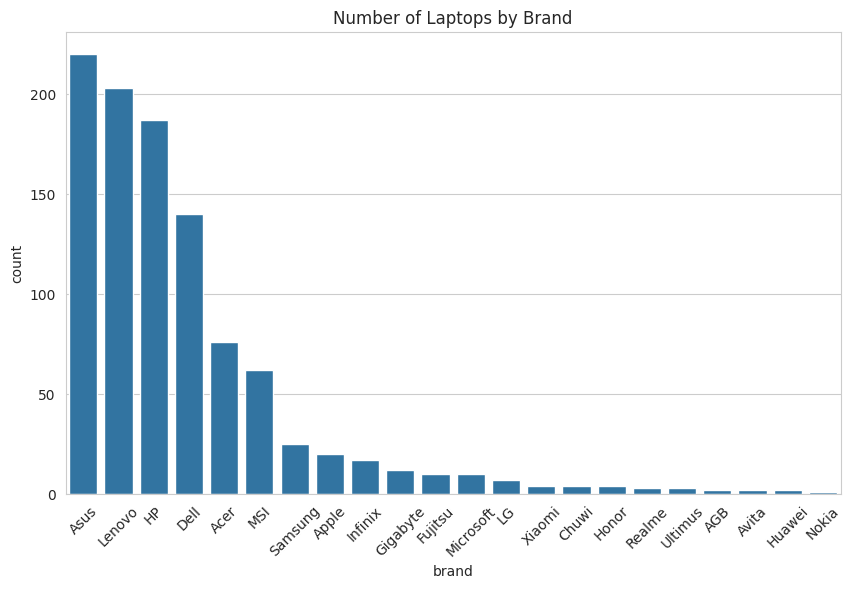

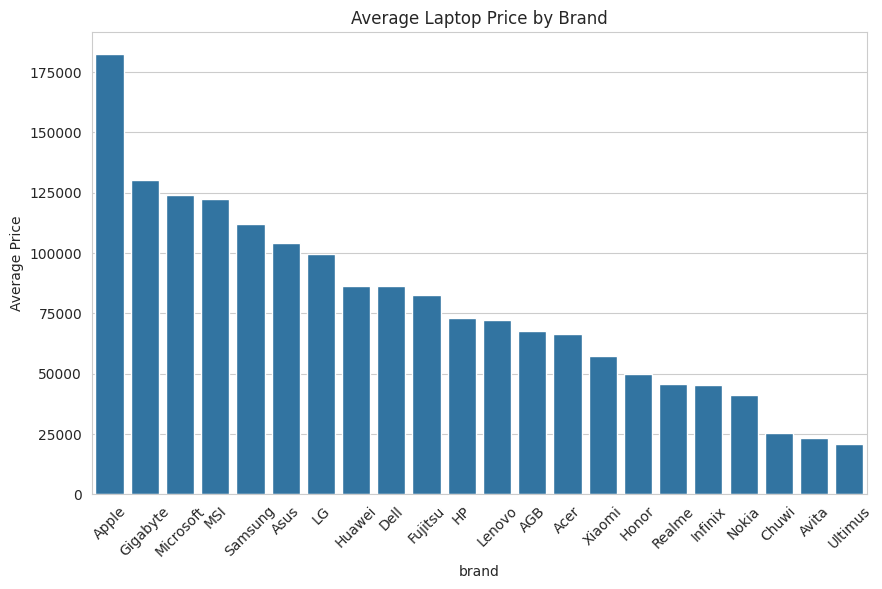

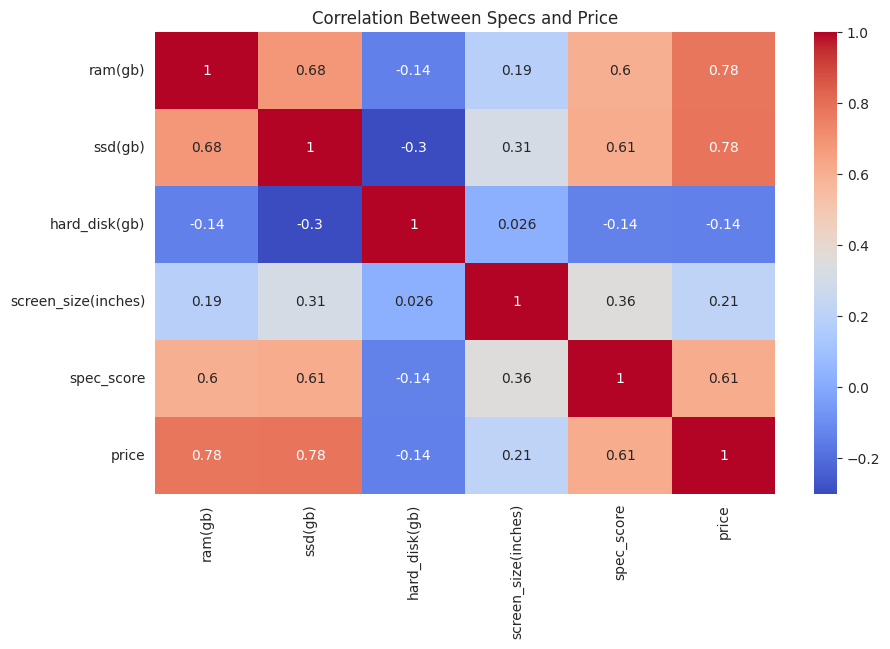

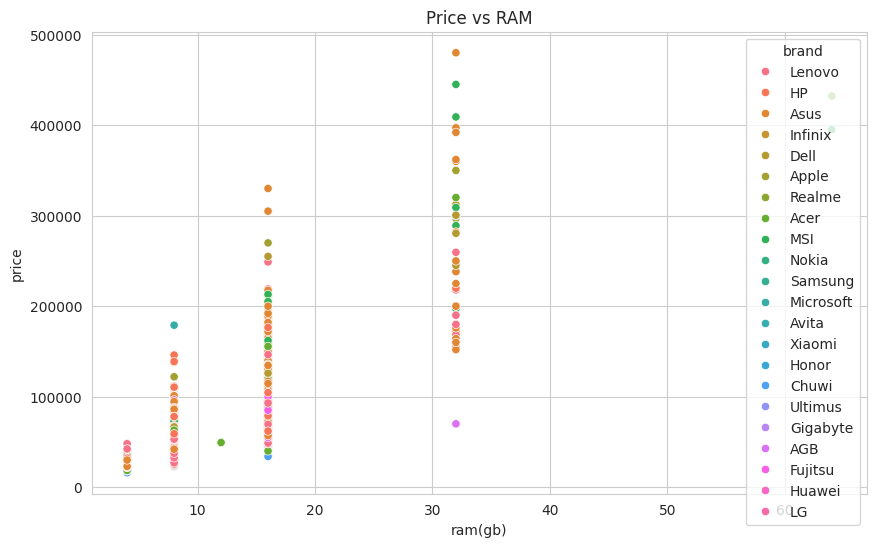

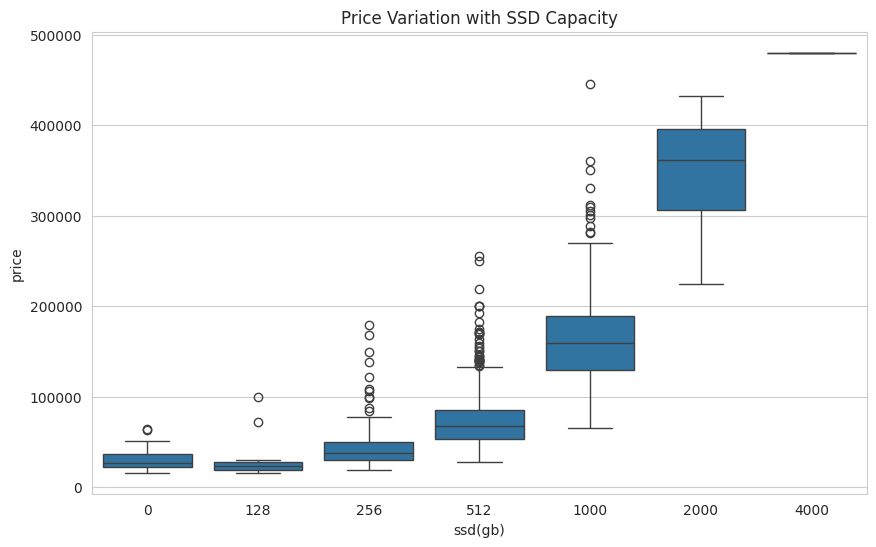

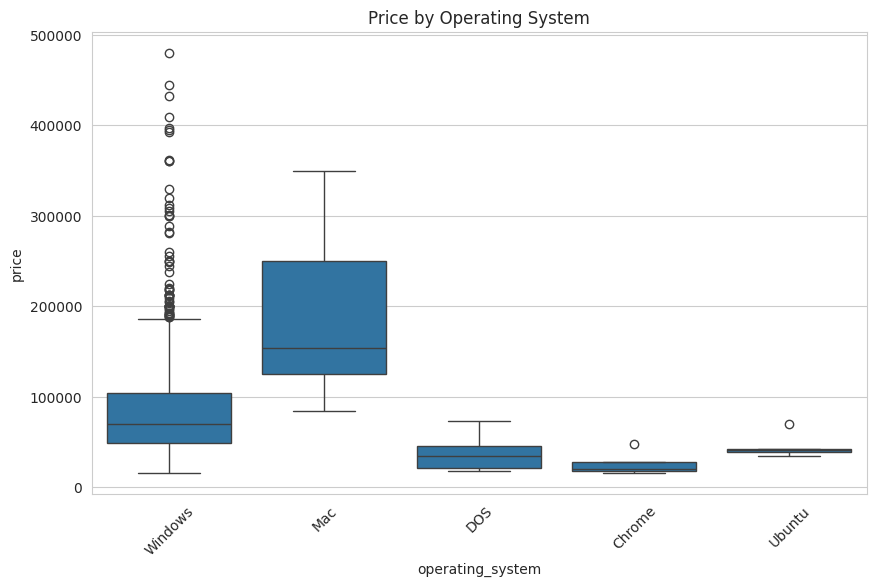

interactive(children=(Dropdown(description='brand', options=('Lenovo', 'HP', 'Asus', 'Infinix', 'Dell', 'Apple…


📊 KEY INSIGHTS:
1️⃣ Brands like Apple, Dell, and HP tend to have higher average prices.
2️⃣ More RAM and SSD capacity usually increase laptop prices.
3️⃣ Higher 'spec_score' is strongly correlated with higher prices.
4️⃣ Laptops with newer processors (i7, Ryzen 7) are costlier than older ones.
5️⃣ Windows is the most common OS; macOS laptops are fewer but premium.

 Cleaned data saved as cleaned_laptop_data.csv


In [6]:
# ======================================================
# 💻 LAPTOP DATA ANALYSIS PROJECT
# Dataset: laptop.csv
# ======================================================

# 🧠 STEP 1: SETUP
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from ipywidgets import interact
from google.colab import files

# Set display options
pd.set_option('display.max_columns', None)
plt.rcParams['figure.figsize'] = (10, 6)
sns.set_style('whitegrid')

# ======================================================
# 📂 STEP 2: LOAD DATASET
# ======================================================
# Upload file manually from your computer if not uploaded yet
# uploaded = files.upload()

# Load dataset
df = pd.read_csv("laptop.csv")
print(" Data Loaded Successfully!")
print("Rows:", df.shape[0], " | Columns:", df.shape[1])

# Preview
df.head()

# ======================================================
# 🧹 STEP 3: DATA PREPROCESSING
# ======================================================

# Check for missing values
print("\n🔍 Missing Values:\n", df.isnull().sum())

# Fill missing numeric columns with median, categorical with mode
df.fillna({
    'ram(GB)': df['ram(GB)'].median(),
    'ssd(GB)': df['ssd(GB)'].median(),
    'Hard Disk(GB)': df['Hard Disk(GB)'].median(),
    'Operating System': df['Operating System'].mode()[0],
}, inplace=True)

# Clean column names
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')

# Remove duplicates
df.drop_duplicates(inplace=True)

# Confirm cleaning
print("\n After Cleaning:")
print(df.info())

# ======================================================
# 📊 STEP 4: EXPLORATORY DATA ANALYSIS (EDA)
# ======================================================

# Summary statistics
print("\n📋 Summary Statistics:")
display(df.describe(include='all'))

# Distribution of numeric columns
num_cols = ['ram(gb)', 'ssd(gb)', 'hard_disk(gb)', 'screen_size(inches)', 'spec_score', 'price']

for col in num_cols:
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()

# Count of laptops by brand
sns.countplot(data=df, x='brand', order=df['brand'].value_counts().index)
plt.xticks(rotation=45)
plt.title('Number of Laptops by Brand')
plt.show()

# Average price by brand
avg_price = df.groupby('brand')['price'].mean().sort_values(ascending=False)
sns.barplot(x=avg_price.index, y=avg_price.values)
plt.xticks(rotation=45)
plt.title('Average Laptop Price by Brand')
plt.ylabel('Average Price')
plt.show()

# Correlation heatmap
corr = df[num_cols].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Between Specs and Price')
plt.show()

# ======================================================
# 📈 STEP 5: VISUAL INSIGHTS
# ======================================================

# Price vs RAM
sns.scatterplot(data=df, x='ram(gb)', y='price', hue='brand')
plt.title('Price vs RAM')
plt.show()

# Price vs SSD
sns.boxplot(data=df, x='ssd(gb)', y='price')
plt.title('Price Variation with SSD Capacity')
plt.show()

# Price by Operating System
sns.boxplot(data=df, x='operating_system', y='price')
plt.xticks(rotation=45)
plt.title('Price by Operating System')
plt.show()

# ======================================================
# 🎛️ STEP 6: INTERACTIVE FILTERS
# ======================================================

@interact(brand=df['brand'].unique())
def show_laptops(brand):
    display(df[df['brand'] == brand][['model_name', 'processor_name', 'ram(gb)', 'ssd(gb)', 'price']].head(10))

# ======================================================
# 💡 STEP 7: INSIGHTS & OBSERVATIONS
# ======================================================

print("""
📊 KEY INSIGHTS:
1️⃣ Brands like Apple, Dell, and HP tend to have higher average prices.
2️⃣ More RAM and SSD capacity usually increase laptop prices.
3️⃣ Higher 'spec_score' is strongly correlated with higher prices.
4️⃣ Laptops with newer processors (i7, Ryzen 7) are costlier than older ones.
5️⃣ Windows is the most common OS; macOS laptops are fewer but premium.
""")

# ======================================================
# 💾 STEP 8: SAVE CLEANED DATA
# ======================================================
df.to_csv("cleaned_laptop_data.csv", index=False)
print(" Cleaned data saved as cleaned_laptop_data.csv")

# ======================================================
# 🏁 END OF PROJECT
# ======================================================